In [79]:
#Imports a utilizar
from tensorflow.keras import models #Crear/entrenar/evaluar el modelo
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout #Capas densas para la red
from tensorflow.keras.optimizers import Adam #Optimizador a utilizar
import numpy as np #Manejar los arreglos con los datos
import pandas as pd #Tomar el dataset y convertir datos categoricos
from sklearn.model_selection import train_test_split #Para separar train de test
import matplotlib.pyplot as  plt #Para graficar

# Parte 1: Celsius a Fahrenheit

In [80]:
#Creo el modelo
model = models.Sequential()

#Añado la capa

model.add(Dense(1, input_dim=1))

#Compilo el modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss="mse")

model.summary()

/Users/matiasurbieta/Dropbox/cursos/python_flsk_ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
#Los datos a usar
X = np.array([-40, 0, 15, 20, 25, 30, 55, 67, 12.5, 17.3])
Y = np.array([-40, 32, 59, 68, 77, 86, 131, 152.6, 54.5, 63.14])

#Separo los datos en training y testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [82]:
#Entreno la red
historial = model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 4798.9097
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 4332.3154
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3892.1909
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3478.9424
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3092.8896
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2734.2424
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2403.0928
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2099.4065
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1823.0040
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1573.5525
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1350.5535
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1153.3369
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 981.0520
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 832.6675
Epoch 15/1000
1/1 ━━━━━━━━━━━━

In [83]:
test_loss = model.evaluate(X_test, Y_test)
print(test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.1131
1.1131134033203125


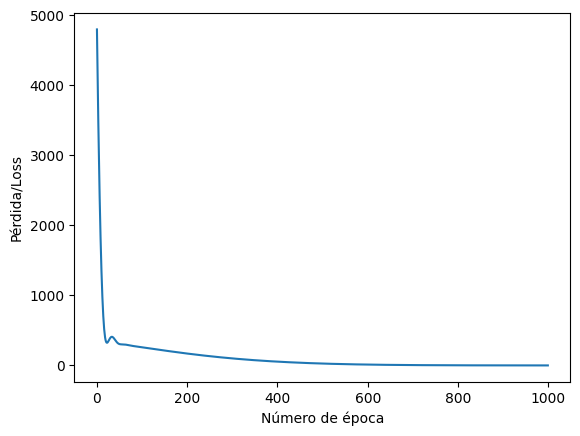

In [84]:
#Grafico el loss a lo largo de las epochs
plt.xlabel("Número de época")
plt.ylabel("Pérdida/Loss")
plt.plot(historial.history["loss"])

In [86]:
#Predicción de los primeros 3 elementos de entrenamiento
print("Datos a predecir:")
print(X_train[:3])
print("-----------------")
result = model.predict(X_train[:3])
print("Resultados obtenidos:")
print(result)
print("Valores correctos:")
print(Y_train[:3])

Datos a predecir:
[67. 25. 20.]
-----------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Resultados obtenidos:
[[153.00227]
 [ 76.68547]
 [ 67.60014]]
Valores correctos:
[152.6  77.   68. ]


In [87]:
print(model.get_weights())

[array([[1.8170666]], dtype=float32), array([31.258808], dtype=float32)]


# Parte 2: Sueldos

In [88]:
!git clone https://github.com/gabyaleperez/redesNeuronales

fatal: destination path 'redesNeuronales' already exists and is not an empty directory.


In [101]:
#Creo el modelo
model = models.Sequential()

#Añado de a una capa
model.add(Dense(20, input_dim=6, activation="relu", kernel_initializer="random_normal"))
#model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation="relu"))

/Users/matiasurbieta/Dropbox/cursos/python_flsk_ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
#Compilo el modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss="mse")

In [103]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [104]:
#Cargo el dataset
data = pd.read_csv("redesNeuronales/datos_empleados_50000.csv")

#Pasa de 4 inputs a 6 -> Convierte Categoria en 3 entradas.
data = pd.get_dummies(data)
data=data.astype(np.float32)

#Separo los datos de entrada X y los datos de salida Y
Y = np.array(data["sueldo"])
X = data.drop(["sueldo"], axis=1)
X = np.array(X.drop(data.columns[0], axis=1))

#Separo los datos en training y testing


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [109]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)

#Entreno la red
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
historial = model.fit(X_train,Y_train,epochs=25,batch_size=40) #callbacks=[early_stopping_monitor])



Epoch 1/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - loss: 2343023.5000
Epoch 2/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 1906085.6250
Epoch 3/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 1478807.6250
Epoch 4/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 1079590.5000
Epoch 5/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 789663.8750
Epoch 6/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - loss: 801757.0000
Epoch 7/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 594726.9375
Epoch 8/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 710440.9375
Epoch 9/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - loss: 429090.7500
Epoch 10/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - loss: 614300.8750
Epoch 11/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - loss: 492299.5625
Epoch 12/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 598864.0625 
Epoch 13/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - loss: 379517.7188
Epo

In [110]:
test_loss = model.evaluate(X_test, Y_test)
print(test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 17106.8359
17106.8359375


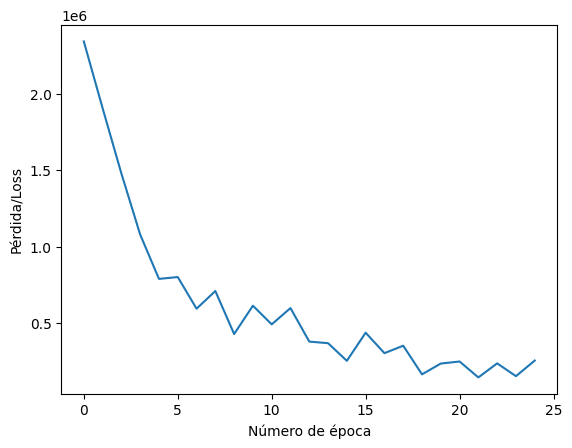

In [111]:
#Grafico el loss a lo largo de las epochs
plt.xlabel("Número de época")
plt.ylabel("Pérdida/Loss")
plt.plot(historial.history["loss"])

In [112]:
#Predicción de los primeros 3 elementos de entrenamiento
print("Datos a predecir:")
print(X_train[:3])
print("-----------------")
result = model.predict(X_train[:3])
print("Resultados obtenidos:")
print(result)
print("Valores correctos:")
print(Y_train[:3])

Datos a predecir:
[[4.60e+04 1.00e+00 3.00e+00 0.00e+00 1.00e+00 0.00e+00]
 [4.52e+04 1.00e+00 2.00e+00 1.00e+00 0.00e+00 0.00e+00]
 [7.31e+04 1.00e+00 3.00e+00 0.00e+00 1.00e+00 0.00e+00]]
-----------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Resultados obtenidos:
[[50186.81 ]
 [48002.176]
 [77412.984]]
Valores correctos:
[50250. 48000. 77350.]


In [113]:
model.save("model.keras")
model = tf.keras.models.load_model("model.keras")